In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 확진자 데이터 전처리

In [2]:
patient_path = '/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/PatientInfo.csv'
patient_data = pd.read_csv(patient_path)
patient_data

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [3]:
# 환자 데이터 전처리
patient_data = patient_data[['confirmed_date', 'province', 'city', 'infection_case']]
patient_data = patient_data[patient_data['confirmed_date']<="2020-05-31"]
patient_data_seoul = patient_data[patient_data['province']=='Seoul']
patient_data_seoul

,confirmed_date,province,city,infection_case
0,2020-01-23,Seoul,Gangseo-gu,overseas inflow
1,2020-01-30,Seoul,Jungnang-gu,overseas inflow
2,2020-01-30,Seoul,Jongno-gu,contact with patient
3,2020-01-30,Seoul,Mapo-gu,overseas inflow
4,2020-01-31,Seoul,Seongbuk-gu,contact with patient
...,...,...,...,...
857,2020-05-30,Seoul,Seodaemun-gu,overseas inflow
858,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class
859,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class
860,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class


In [4]:
# overseas inflow 값 결측치로 변경
patient_data_seoul.loc[patient_data_seoul.infection_case=='overseas inflow', 'infection_case'] = np.nan
patient_data_seoul

,confirmed_date,province,city,infection_case
0,2020-01-23,Seoul,Gangseo-gu,NaN
1,2020-01-30,Seoul,Jungnang-gu,NaN
2,2020-01-30,Seoul,Jongno-gu,contact with patient
3,2020-01-30,Seoul,Mapo-gu,NaN
4,2020-01-31,Seoul,Seongbuk-gu,contact with patient
...,...,...,...,...
857,2020-05-30,Seoul,Seodaemun-gu,NaN
858,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class
859,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class
860,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class


In [5]:
patient_data_seoul.isnull()

,confirmed_date,province,city,infection_case
0,False,False,False,True
1,False,False,False,True
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
857,False,False,False,True
858,False,False,False,False
859,False,False,False,False
860,False,False,False,False


In [6]:
patient_data_seoul.dropna(how='all', subset=['infection_case'], inplace=True)
patient_data_seoul

,confirmed_date,province,city,infection_case
2,2020-01-30,Seoul,Jongno-gu,contact with patient
4,2020-01-31,Seoul,Seongbuk-gu,contact with patient
5,2020-01-31,Seoul,Jongno-gu,contact with patient
6,2020-01-31,Seoul,Jongno-gu,contact with patient
9,2020-02-05,Seoul,Seongbuk-gu,contact with patient
...,...,...,...,...
854,2020-05-29,Seoul,Eunpyeong-gu,Korea Campus Crusade of Christ
855,2020-05-30,Seoul,Gangseo-gu,Korea Campus Crusade of Christ
858,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class
859,2020-05-30,Seoul,Yeongdeungpo-gu,Yeonana News Class


In [7]:
patient_data_seoul = patient_data_seoul[['confirmed_date', 'city']]
patient_data_seoul

,confirmed_date,city
2,2020-01-30,Jongno-gu
4,2020-01-31,Seongbuk-gu
5,2020-01-31,Jongno-gu
6,2020-01-31,Jongno-gu
9,2020-02-05,Seongbuk-gu
...,...,...
854,2020-05-29,Eunpyeong-gu
855,2020-05-30,Gangseo-gu
858,2020-05-30,Yeongdeungpo-gu
859,2020-05-30,Yeongdeungpo-gu


In [8]:
patient_data_seoul = patient_data_seoul[patient_data_seoul['city']!='etc']
patient_data_seoul

,confirmed_date,city
2,2020-01-30,Jongno-gu
4,2020-01-31,Seongbuk-gu
5,2020-01-31,Jongno-gu
6,2020-01-31,Jongno-gu
9,2020-02-05,Seongbuk-gu
...,...,...
854,2020-05-29,Eunpyeong-gu
855,2020-05-30,Gangseo-gu
858,2020-05-30,Yeongdeungpo-gu
859,2020-05-30,Yeongdeungpo-gu


In [9]:
# 날짜별 확진자
patient_data_date = patient_data_seoul.groupby(['confirmed_date']).count()
patient_data_date

,city
confirmed_date,
2020-01-30,1
2020-01-31,3
2020-02-05,1
2020-02-16,2
2020-02-19,2
...,...
2020-05-26,16
2020-05-27,17
2020-05-28,16


In [10]:
idx = pd.date_range('2020-01-20', '2020-05-29')

patient_data_date = pd.DataFrame(patient_data_date)
patient_data_date.index = pd.DatetimeIndex(patient_data_date.index)
patient_data_date = patient_data_date.reindex(idx)
patient_data_date

,city
2020-01-20,NaN
2020-01-21,NaN
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
...,...
2020-05-25,7.0
2020-05-26,16.0
2020-05-27,17.0
2020-05-28,16.0


In [11]:
patient_data_date = patient_data_date.replace(np.nan,0)
patient_data_date

,city
2020-01-20,0.0
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
...,...
2020-05-25,7.0
2020-05-26,16.0
2020-05-27,17.0
2020-05-28,16.0


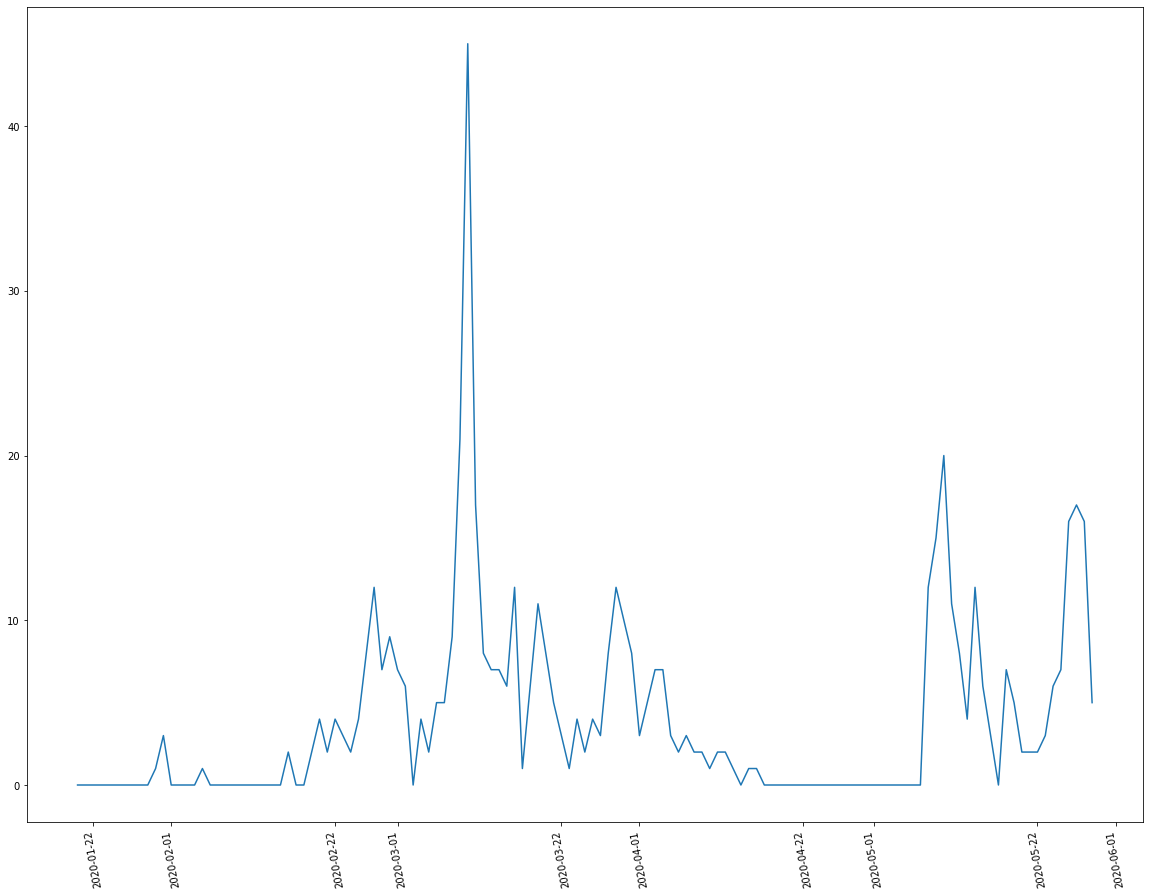

In [12]:
x = patient_data_date.index
y = patient_data_date['city']

plt.figure(figsize=(20, 15))
plt.xticks(rotation=100)
plt.plot(x,y)
plt.show()

# 유동인구 데이터 전처리

In [13]:
floating_path = '/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/SeoulFloating.csv'
floating_data = pd.read_csv(floating_path)
floating_data

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [14]:
floating_data = floating_data[['date', 'city', 'fp_num']]
floating_data = floating_data[floating_data['date']>='2020-01-20']
floating_data

,date,city,fp_num
136800,2020-01-20,Dobong-gu,21740
136801,2020-01-20,Dobong-gu,22110
136802,2020-01-20,Dongdaemun-gu,28330
136803,2020-01-20,Dongdaemun-gu,29610
136804,2020-01-20,Dongjag-gu,32570
...,...,...,...
1084795,2020-05-31,Dobong-gu,27620
1084796,2020-05-31,Songpa-gu,56560
1084797,2020-05-31,Gangdong-gu,38960
1084798,2020-05-31,Guro-gu,25420


In [15]:
floating_data_date = floating_data.groupby(['date']).mean()
floating_data_date

,fp_num
date,
2020-01-20,28224.613889
2020-01-21,28207.688889
2020-01-22,28109.941667
2020-01-23,27354.609722
2020-01-24,24460.348611
...,...
2020-05-27,27679.594444
2020-05-28,27668.033333
2020-05-29,27617.121569


In [16]:
floating_data_city = floating_data.groupby(['city']).mean()
floating_data_city

,fp_num
city,
Dobong-gu,20040.595464
Dongdaemun-gu,24197.448049
Dongjag-gu,26016.285601
Eunpyeong-gu,28039.396624
Gangbuk-gu,19908.943565
Gangdong-gu,27816.042722
Gangnam-gu,48539.308281
Gangseo-gu,36840.478903
Geumcheon-gu,18892.237078


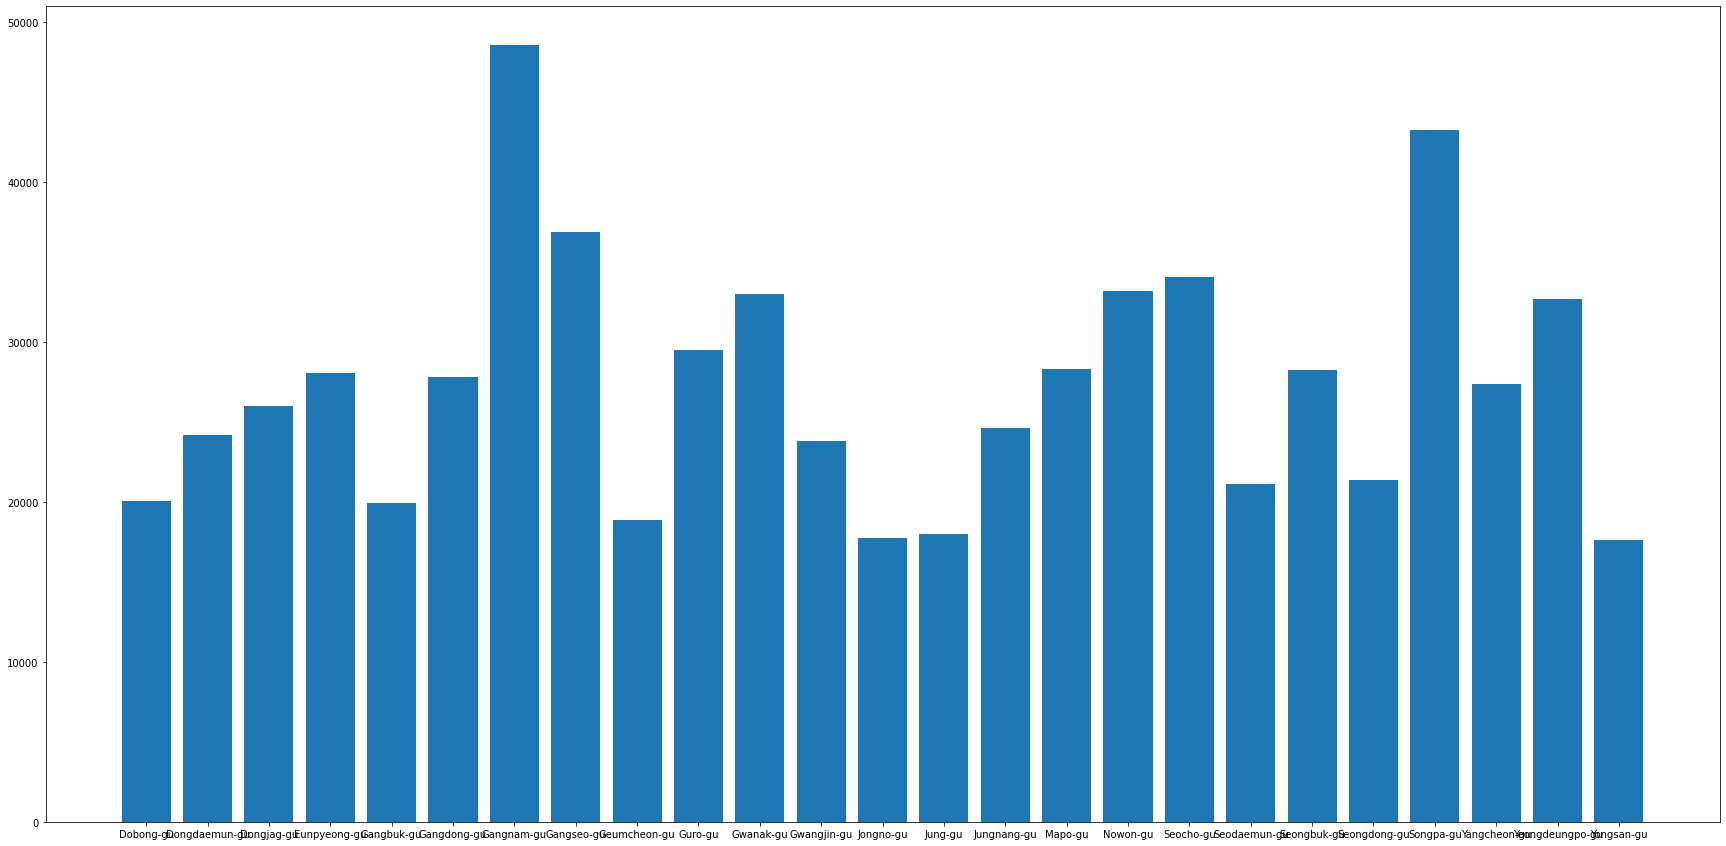

In [17]:
x = floating_data_city.index
y = floating_data_city['fp_num']

plt.figure(figsize=(30, 15))
plt.bar(x, y)
plt.show()

In [18]:
# day_day=day_day.reset_index()
# day_day

patient_data_date = patient_data_date.reset_index()
patient_data_date.rename(columns={'index' : 'date'}, inplace=True)
patient_data_date = patient_data_date[['date', 'city']]
patient_data_date

,date,city
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,0.0
4,2020-01-24,0.0
...,...,...
126,2020-05-25,7.0
127,2020-05-26,16.0
128,2020-05-27,17.0
129,2020-05-28,16.0


In [19]:
floating_data_date = floating_data_date.reset_index()
floating_data_date

,date,fp_num
0,2020-01-20,28224.613889
1,2020-01-21,28207.688889
2,2020-01-22,28109.941667
3,2020-01-23,27354.609722
4,2020-01-24,24460.348611
...,...,...
127,2020-05-27,27679.594444
128,2020-05-28,27668.033333
129,2020-05-29,27617.121569
130,2020-05-30,26343.631944


In [24]:
# day_day = pd.concat([patient_data_date, floating_data_date])

day_day = pd.merge(patient_data_date, floating_data_date, on='date')

day_day

ValueError: ignored

In [19]:
# day_day = pd.DataFrame(day_day)
# day_day.index = pd.DatetimeIndex(day_day.index)
# # day_day = day_day.reindex(idx)
# day_day

,city,fp_num
2020-01-20,0.0,NaN
2020-01-21,0.0,NaN
2020-01-22,0.0,NaN
2020-01-23,0.0,NaN
2020-01-24,0.0,NaN
...,...,...
2020-05-27,NaN,27679.594444
2020-05-28,NaN,27668.033333
2020-05-29,NaN,27617.121569
2020-05-30,NaN,26343.631944


In [20]:
# day_day['date'] = day_day.index
# day_day.set_index('date', inplace=True)
# day_day

,city,fp_num
date,,
2020-01-20,0.0,NaN
2020-01-21,0.0,NaN
2020-01-22,0.0,NaN
2020-01-23,0.0,NaN
2020-01-24,0.0,NaN
...,...,...
2020-05-27,NaN,27679.594444
2020-05-28,NaN,27668.033333
2020-05-29,NaN,27617.121569


In [21]:
# day_day=day_day.reset_index()
# day_day

,date,city,fp_num
0,2020-01-20,0.0,NaN
1,2020-01-21,0.0,NaN
2,2020-01-22,0.0,NaN
3,2020-01-23,0.0,NaN
4,2020-01-24,0.0,NaN
...,...,...,...
258,2020-05-27,NaN,27679.594444
259,2020-05-28,NaN,27668.033333
260,2020-05-29,NaN,27617.121569
261,2020-05-30,NaN,26343.631944


In [23]:
# # day_day = day_day.replace(np.nan,0)
# # day_day

# day_day.dropna(axis=1)
# day_day

,date,city,fp_num
0,2020-01-20,0.0,NaN
1,2020-01-21,0.0,NaN
2,2020-01-22,0.0,NaN
3,2020-01-23,0.0,NaN
4,2020-01-24,0.0,NaN
...,...,...,...
258,2020-05-27,NaN,27679.594444
259,2020-05-28,NaN,27668.033333
260,2020-05-29,NaN,27617.121569
261,2020-05-30,NaN,26343.631944
